## Разведывательный анализ данных (EDA)
<code>
    
##### Цель:
    
- Определить наиболее значимые признаки.
- Сформулировать предположения и гипотезы для дальнейшего построения модели.
- Проверить качество данных и очистить их, если это необходимо.
- Определиться с параметрами модели.
    
</code>

<code>

### Для рассмотрения нам дан датасет, в котором содержатся данные об условиях жизни учащихся.

##### Суть проекта:
* отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость 
  по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
    
</code>

<code>

### Описание датасета


1. **school** — аббревиатура школы, в которой учится ученик
    
2. **sex** — пол ученика ('F' - женский, 'M' - мужской)
    
3. **age** — возраст ученика (от 15 до 22)
    
4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)
    
5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. **schoolsup** — дополнительная образовательная поддержка (yes или no)

17. **famsup** — семейная образовательная поддержка (yes или no)

18. **paid** — дополнительные платные занятия по математике (yes или no)

19. **activities** — дополнительные внеучебные занятия (yes или no)

20. **nursery** — посещал детский сад (yes или no)

21. **higher** — хочет получить высшее образование (yes или no)

22. **internet** — наличие интернета дома (yes или no)

23. **romantic** — в романтических отношениях (yes или no)

24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. **absences** — количество пропущенных занятий

29. **score** — баллы по госэкзамену по математике
</code>

In [1]:
# Загрузим необходимые для работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
# Обработанные данные будем записывать в файл students. 
# Работать будем с файлом stud_math.

stud_math = pd.read_csv('stud_math.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(stud_math.head(10))
print('Всего записей в начальном датасете', stud_math.size, '\n') # 
print('Строк, столбцов', stud_math.shape, '\n') # 
display(stud_math.info()) # Посмотрим информацию по датасету.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Всего записей в начальном датасете 11850 

Строк, столбцов (395, 30) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures           

None

In [3]:
print(stud_math.isnull().sum()) # Смотрим, сколько пустых значений  в каждом столбце.
print(round(stud_math.isnull().sum() / len(stud_math) * 100, 2)) # В процентном отношении.

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64
school                  0.00
sex                     0.00
age                     0.00
address                 4.30
famsize                 6.84
Pstatus                11.39
Medu                    0.76
Fedu

#### 2. Работа с пропусками.

Минимальный возраст - 15
Максимальный возраст - 22


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Строк, столбцов (395, 30) 



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Строк, столбцов (395, 29) 



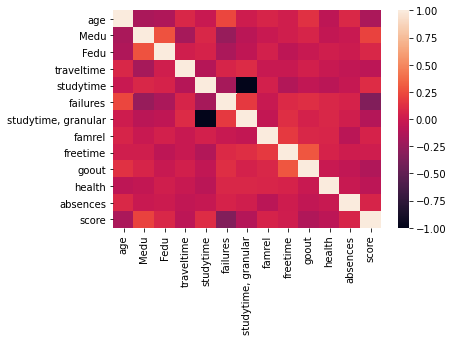

In [66]:
# Большинство признаков у нас категориальные, в этом случае удобно будет пропуски заменить отдельной категорией
# например, other. В дальнейшем можно будет увидеть, насколько сильно отличается принадлежность к этой категории
# от среднего и предположить, имеет ли это значение.

# В некоторых столбцах уже присутствуют такие значения, поскольку количество пропусков не так велико в каждом из столбцов
# и скорее всего имеет случайный характер в каждом из признаков, то в таких случаях не будет иметь большого искажения если
# значение other в них незначительно увеличится.

# Возраст попробуем рассматреть и как числовой, и как категориальный признак, потому что в данном случае это 
# скорее не случайная величина, её значение определено тем, что обучение проходят люди определённых возрастов. 
# Здесь это возрасты от 15 до 22

print('Минимальный возраст -', stud_math.age.min())
print('Максимальный возраст -', stud_math.age.max())

sns.heatmap(stud_math.corr()); # Столбец studytime, granular обратно коррелирует с studytime, можно его удалить
students = stud_math.drop('studytime, granular', axis=1, inplace=False).copy()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(stud_math.head(10))
print('Строк, столбцов', stud_math.shape, '\n')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(students.head(10))
print('Строк, столбцов', students.shape, '\n')

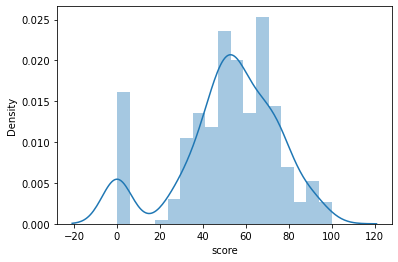

25-й перцентиль: 40.0, 25-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].
Среднее значение - 52.26221079691517
Медиана - 55.0


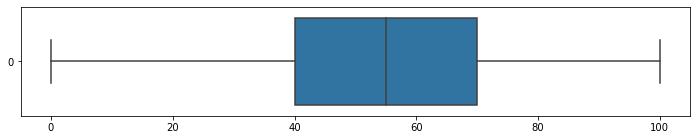

In [58]:
# Числовой признак, который нам интересен - это оценки за экзамен.
# Будем рассматривать его и влияние остальных на него.

# Посмотрим распределение этого признака. Напишем функцию для этого.

def plot_dist_and_characteristics(column, b): # b передаёт параметр bins
    '''Функция рисует диаграмму распределения признака, находит 25-й перцентиль
    25-й перцентиль, границы выбросов, среднее значение, медиану и отображает это на графике'''
    sns.distplot(column, bins = b)
    plt.show()
    plt.figure(figsize=(12,2))
    sns.boxplot(data = column, orient = 'h')
    IQR = column.quantile(0.75) - column.quantile(0.25)
    perc25 = column.quantile(0.25)
    perc75 = column.quantile(0.75)
    print(
    '25-й перцентиль: {},'.format(perc25),
    '25-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    print('Среднее значение -', column.mean()) # Среднее значение
    print('Медиана -', column.median()) # Среднее значение

plot_dist_and_characteristics(stud_math['score'], 17)

In [6]:
# Тут мы можем увидеть, что половина результатов лежит в пределах от 40 до 70 баллов.
# На гистограмме распределение похоже на нормальное, но есть 37 значений, равных нулю, которые выбиваются
# из этого распределения.

stud_math_score0 = stud_math[stud_math['score'] == 0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(stud_math_score0)

# С первого взгляда это обычные данные, где нет каких-то особенных признаков, только столбец пропусков
# тоже заполнен нулевыми значениями, вполне вероятно это могут быть ошибки заполнения базы. 
# Возможно, подойдут два варианта обработки, заполнение средним значением или исключение.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


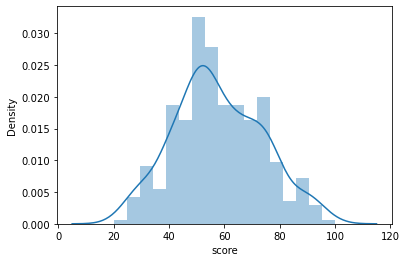

25-й перцентиль: 45.0, 25-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].
Среднее значение - 57.75568181818182
Медиана - 55.0


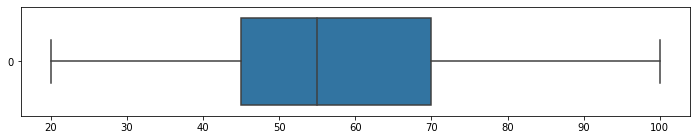

In [59]:
# Наверное, мы можем считать их выбросами и они могут искажать результаты нашей оценки.
# Избавимся от них)

data_score = stud_math[stud_math['score'] > 0]

plot_dist_and_characteristics(data_score['score'], 17)


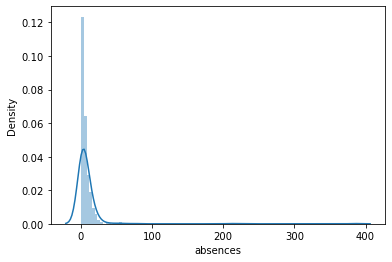

25-й перцентиль: 0.0, 25-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Среднее значение - 7.2793733681462145
Медиана - 4.0


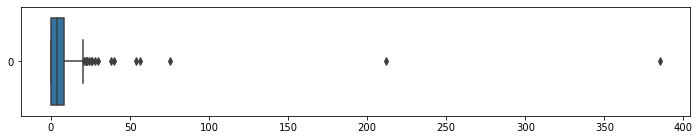

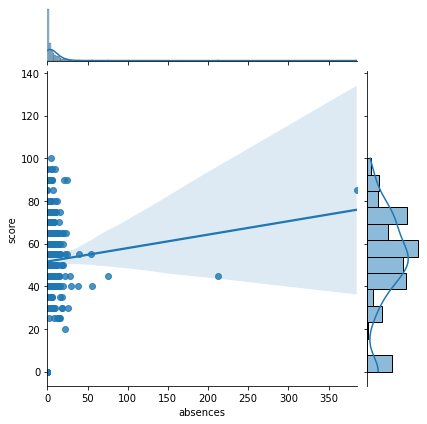

In [63]:
# Рассмотрим столбец пропусков занятий.

plot_dist_and_characteristics(stud_math['absences'], 100)

sns.jointplot(x='absences', y='score', data=stud_math, kind='reg');

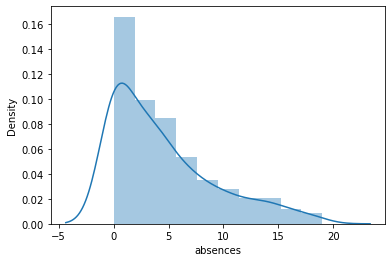

25-й перцентиль: 0.0, 25-й перцентиль: 6.75, IQR: 6.75,  Границы выбросов: [-10.125, 16.875].
Среднее значение - 4.433701657458563
Медиана - 3.0


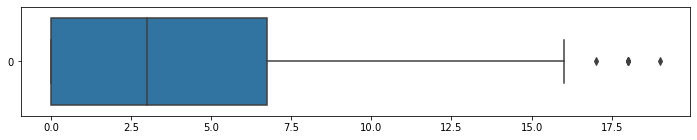

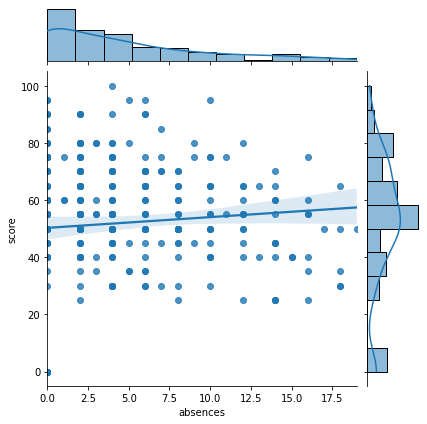

In [64]:
# Мы видим, что в данном столбце есть большое количество выбросов. 
# Попробуем исключить их и посмотреть насколько изменится распределение признака.

data_absences = stud_math[stud_math['absences'] < 20] # Берём значения, которые меньше правой границы выбросов.

plot_dist_and_characteristics(data_absences['absences'], 10)

sns.jointplot(x='absences', y='score', data=data_absences, kind='reg');

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Корреляция после обработки данных 
 [[ 1.         -0.25686978]
 [-0.25686978  1.        ]] 

Корреляция до обработки данных 
 [[1.         0.06528298]
 [0.06528298 1.        ]]


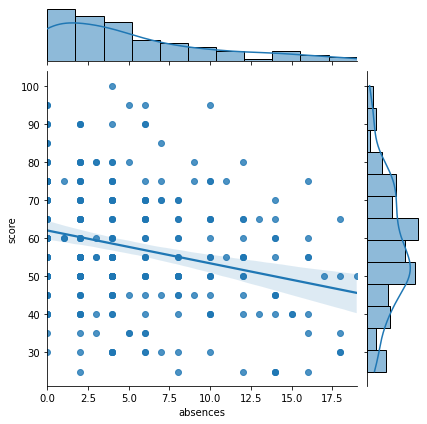

In [93]:
# Теперь попробуем объединить предыдущие изменения.

data_integration = stud_math[(stud_math['absences'] < 20) & (stud_math['score'] > 0)]
display(data_integration)
sns.jointplot(x='absences', y='score', data=data_integration, kind='reg')

# После обработки выбросов и пропусков можно увидеть, что есть небольшая обратная корреляция между этими признаками.


print('Корреляция после обработки данных \n', 
      np.corrcoef(data_integration['absences'], data_integration['score']), '\n')

# В первоначальном варианте, до обработки выбросов, мы можем видеть, что корреляция была прямая и менее значимая.

df_copy1 = pd.DataFrame(stud_math['absences'])
df_copy1['score'] = stud_math['score'].copy()
df_copy1 = df_copy1.dropna(axis=0, how='any')
print('Корреляция до обработки данных \n', np.corrcoef(df_copy1['absences'], df_copy1['score']))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Корреляция после обработки данных 
 [[ 1.         -0.13806928]
 [-0.13806928  1.        ]] 

Корреляция до обработки данных 
 [[ 1.         -0.15572626]
 [-0.15572626  1.        ]]


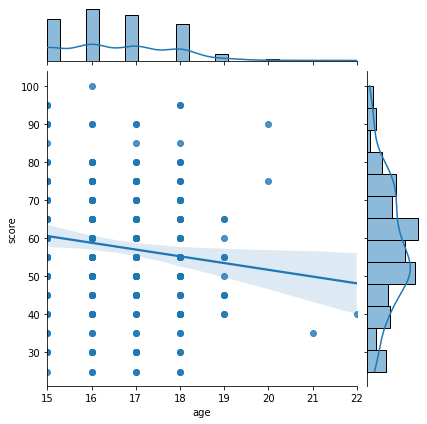

In [92]:
# Теперь сделаем так же для возраста.

data_integration_age = stud_math[(stud_math['age'] < 23) & (stud_math['score'] > 0)]
display(data_integration_age)
sns.jointplot(x='age', y='score', data=data_integration, kind='reg')

# Можно увидеть, что есть небольшая обратная корреляция между этими признаками.


print('Корреляция после обработки данных \n', 
      np.corrcoef(data_integration['age'], data_integration['score']), '\n')

# В первоначальном варианте, до обработки выбросов, мы можем видеть, что корреляция была прямая и менее значимая.

df_copy1 = pd.DataFrame(stud_math['age'])
df_copy1['score'] = stud_math['score'].copy()
df_copy1 = df_copy1.dropna(axis=0, how='any')
print('Корреляция до обработки данных \n', np.corrcoef(df_copy1['age'], df_copy1['score']))

In [94]:
# Функция для замены значений в столбце.

def replace_on(column, value):
    return column.fillna(value, inplace=False)

for value in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian','traveltime', 
              'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
              'romantic', 'famrel', 'freetime', 'goout', 'health']:
    students[value] = replace_on(stud_math[value], 'other').copy()

In [69]:
# Объединим предыдущую обработку в один датафрейм.
students = students[(students['absences'] < 20) & (students['score'] > 0)]
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,other,A,4.0,4.0,at_home,teacher,...,yes,yes,other,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,other,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,other,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,other,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


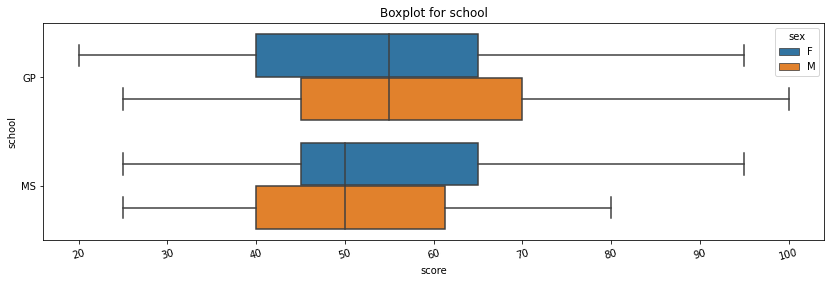

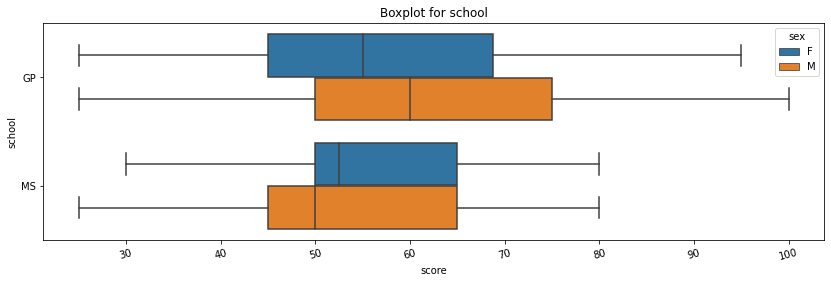

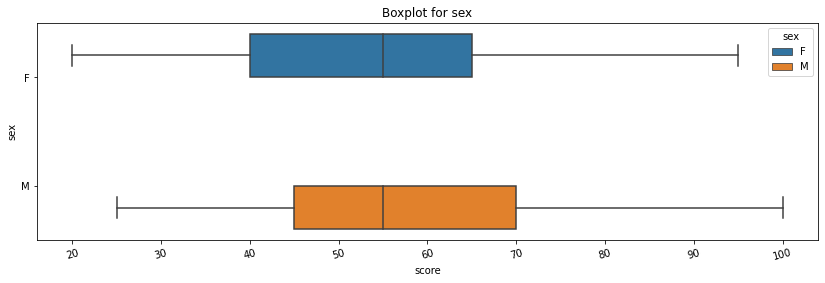

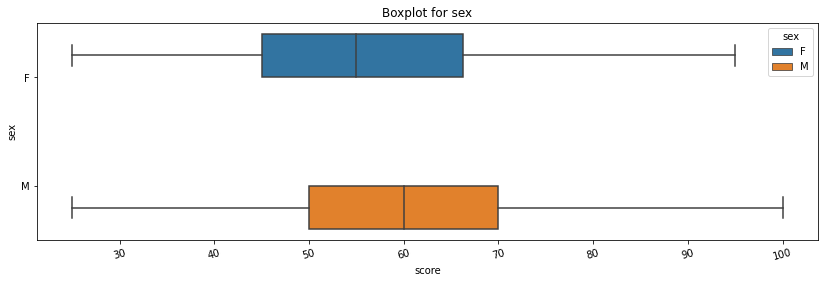

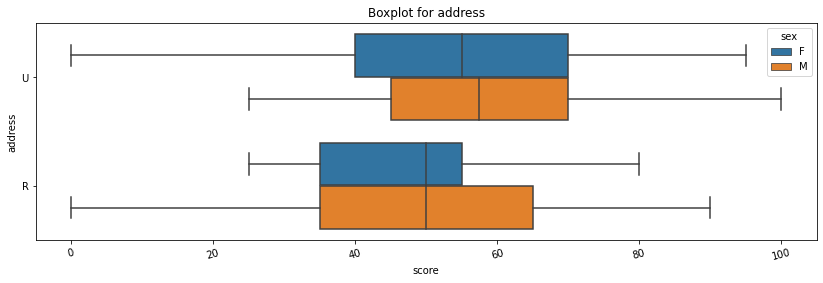

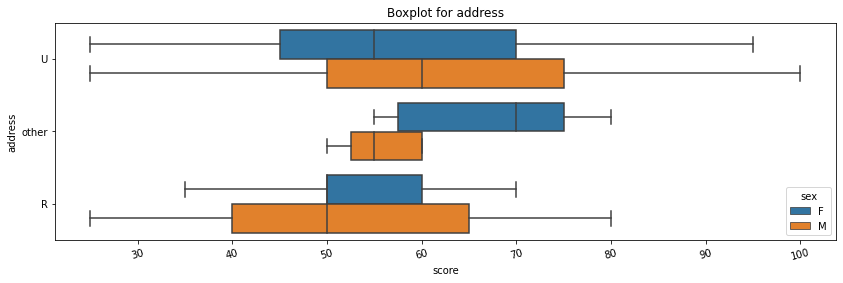

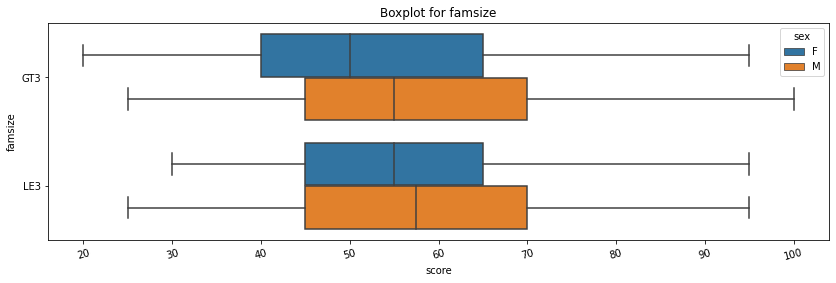

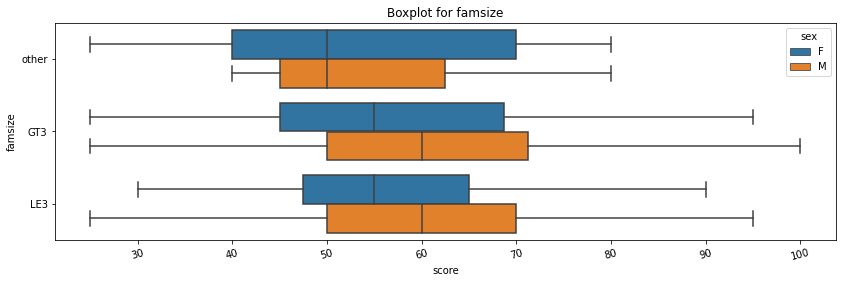

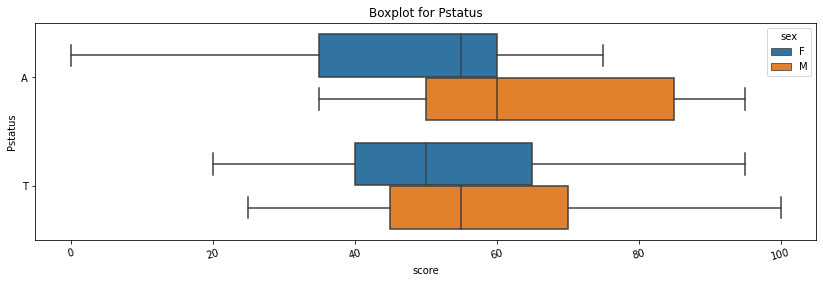

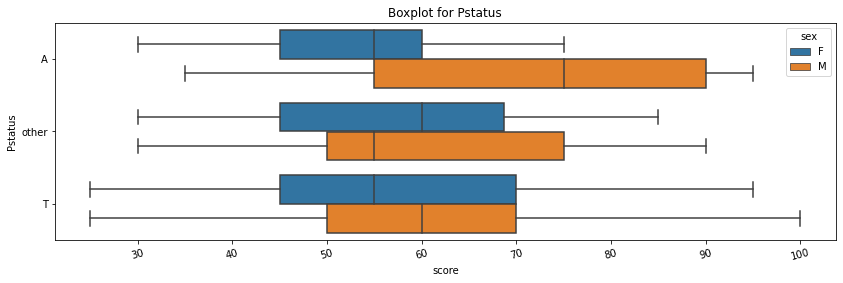

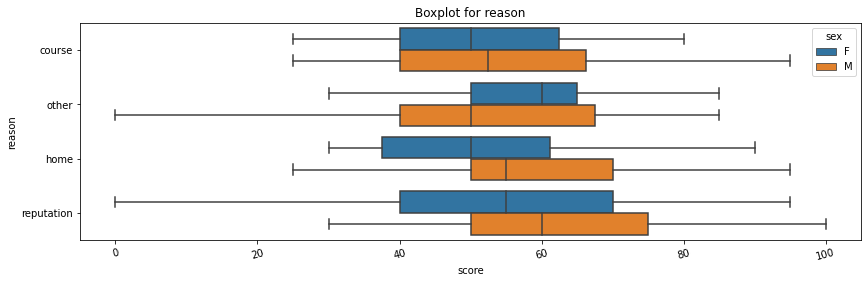

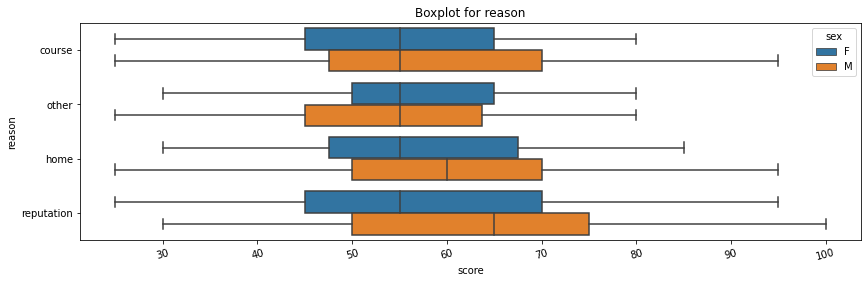

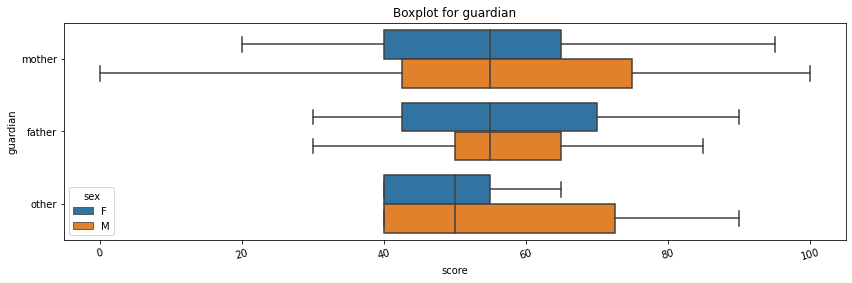

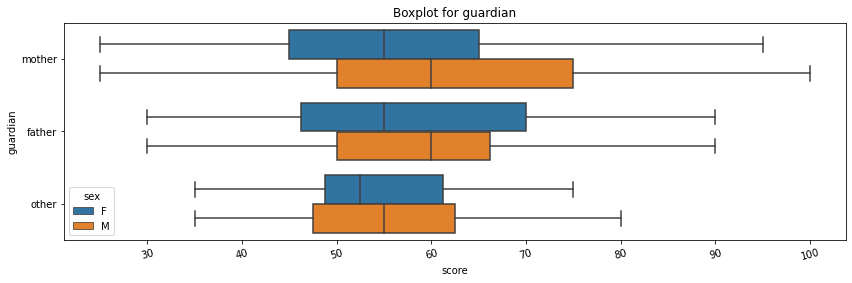

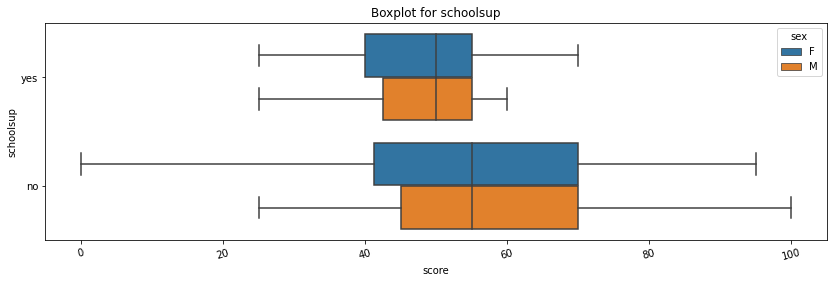

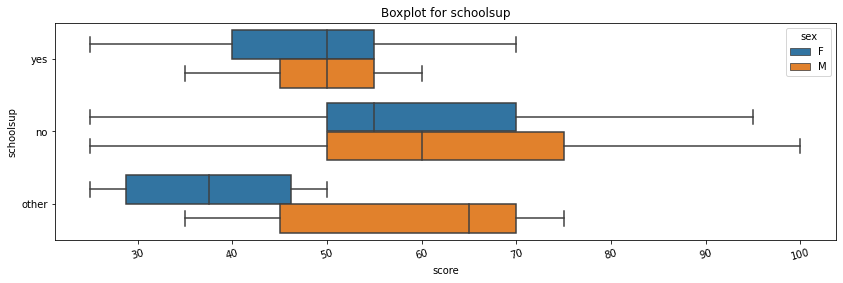

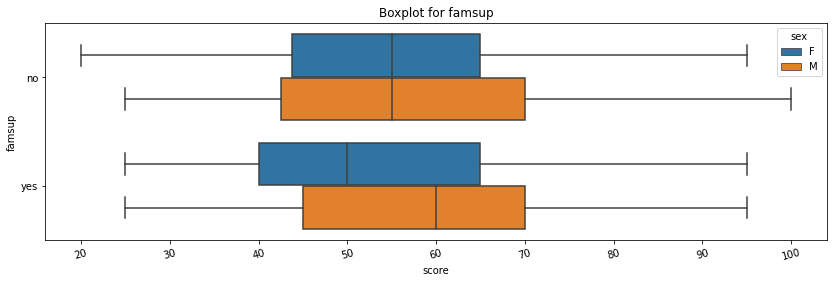

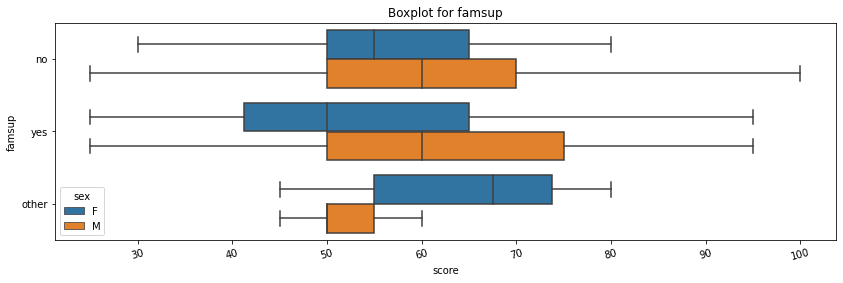

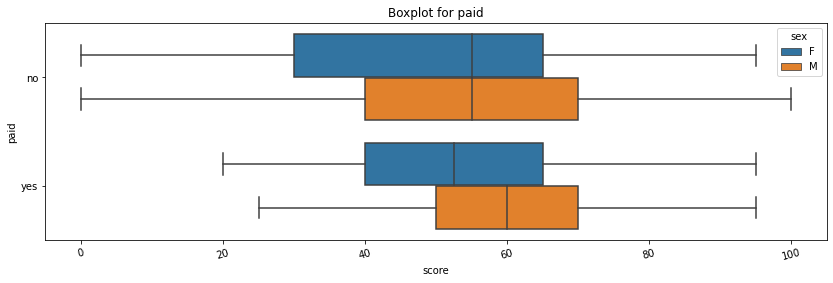

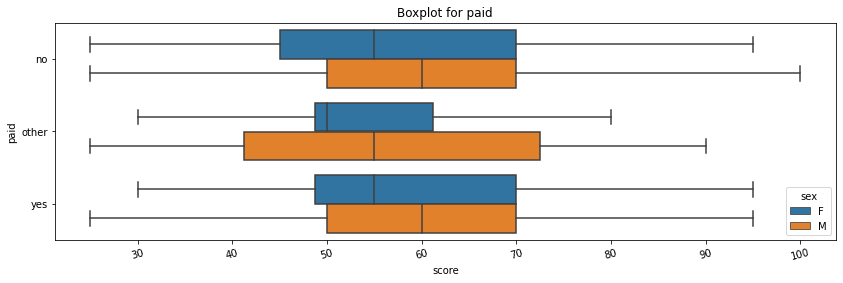

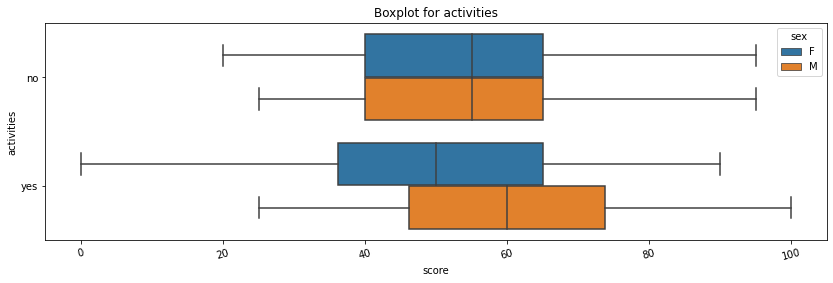

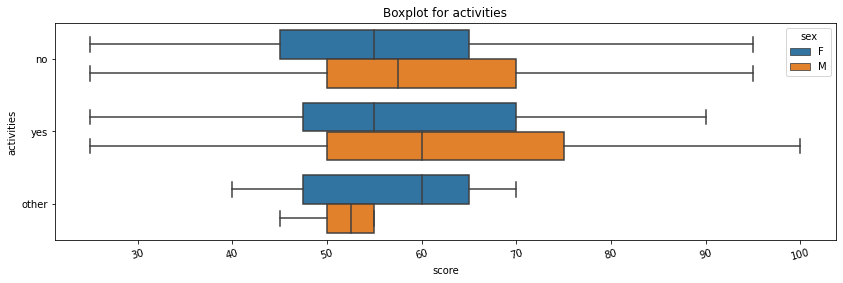

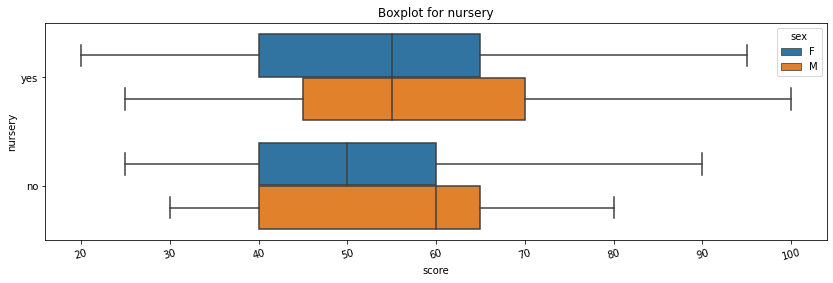

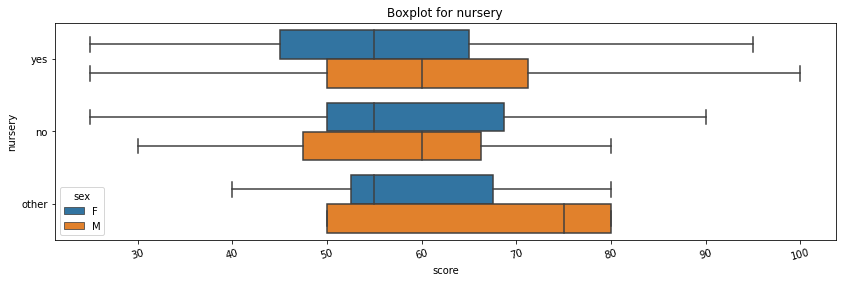

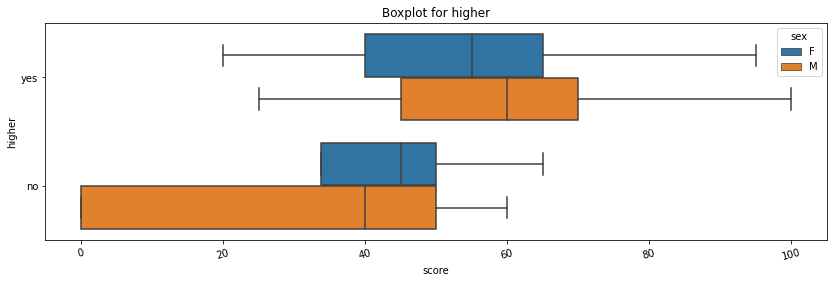

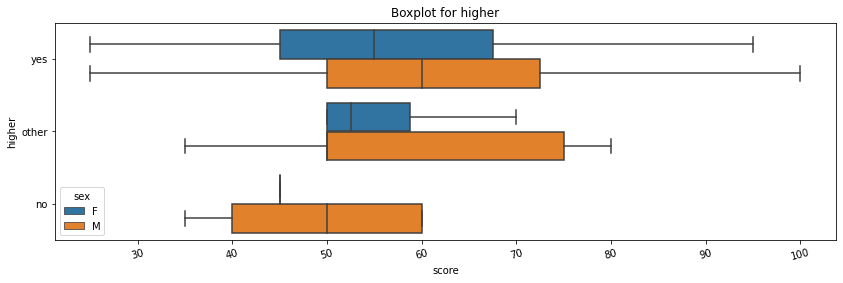

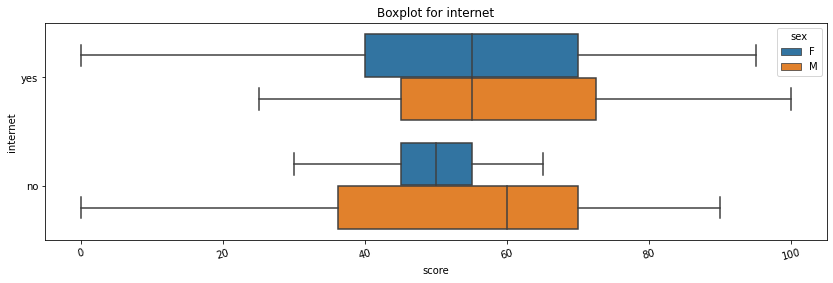

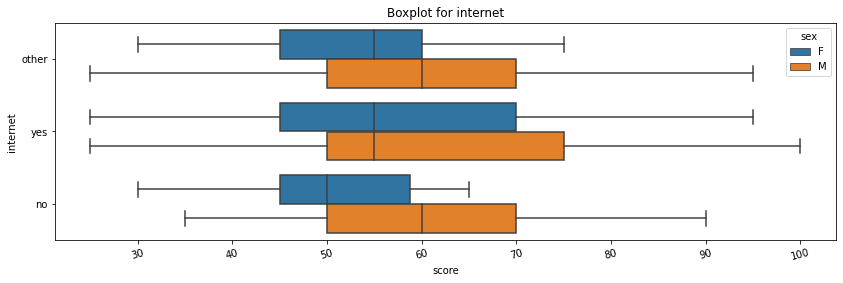

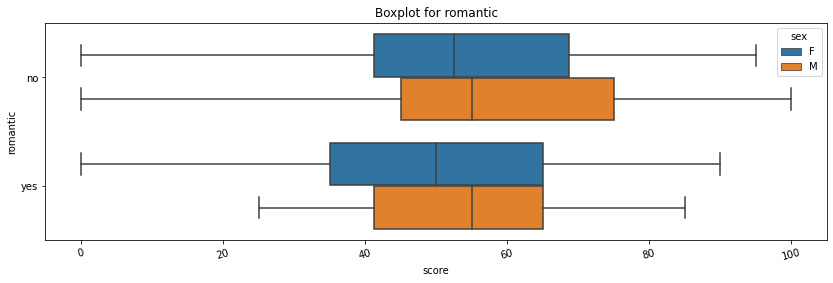

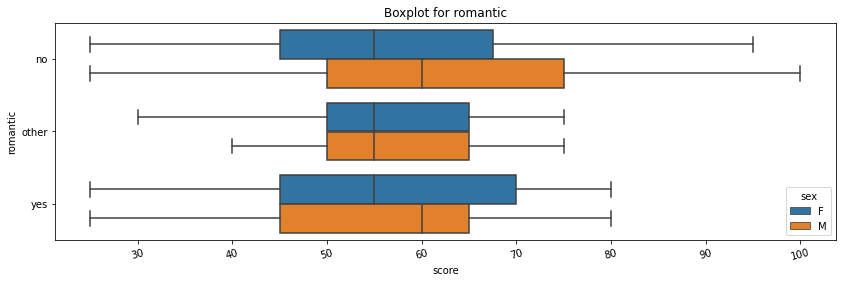

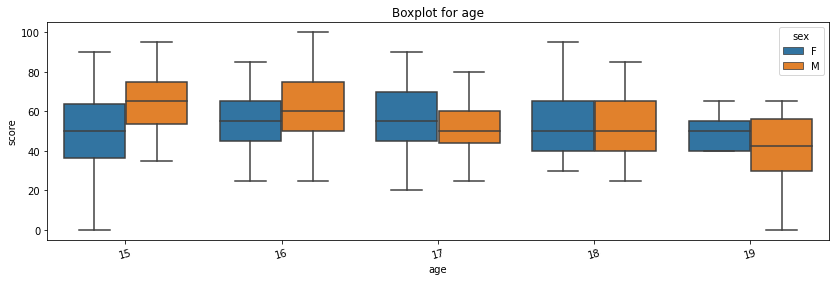

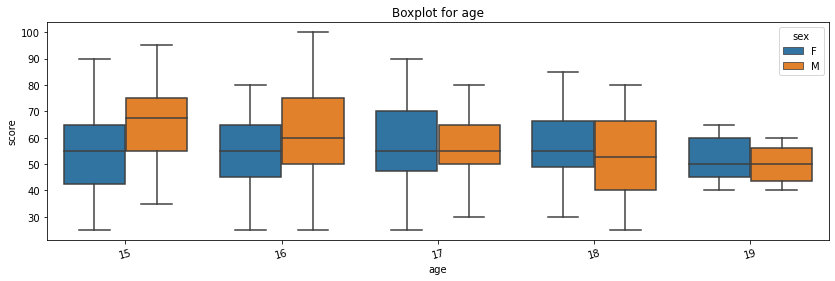

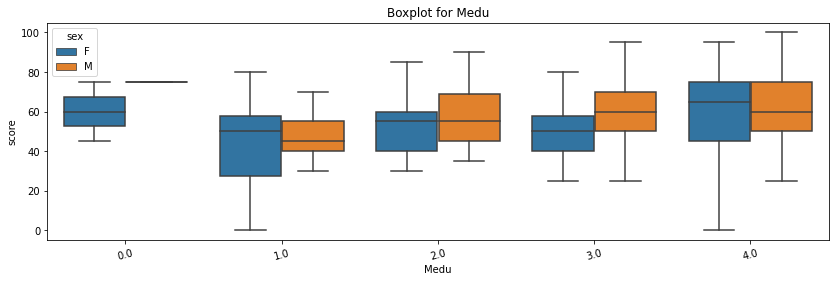

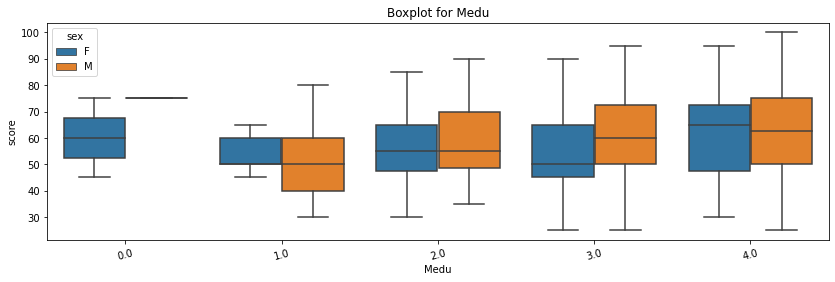

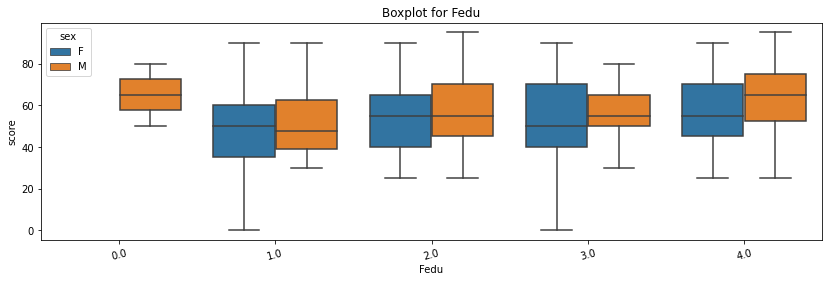

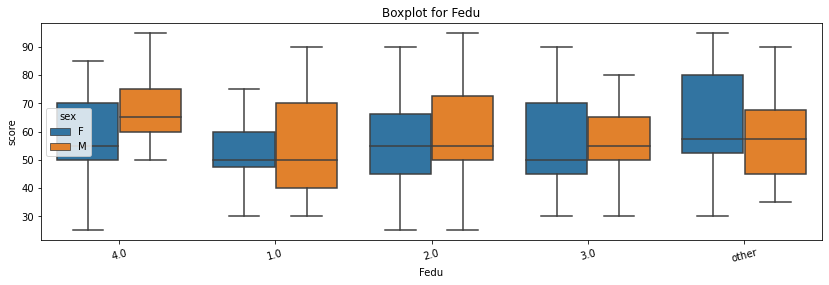

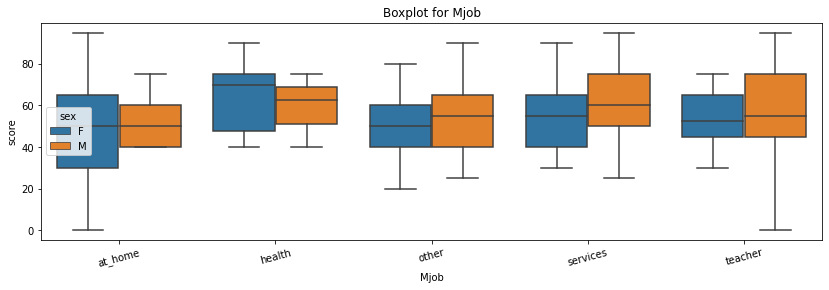

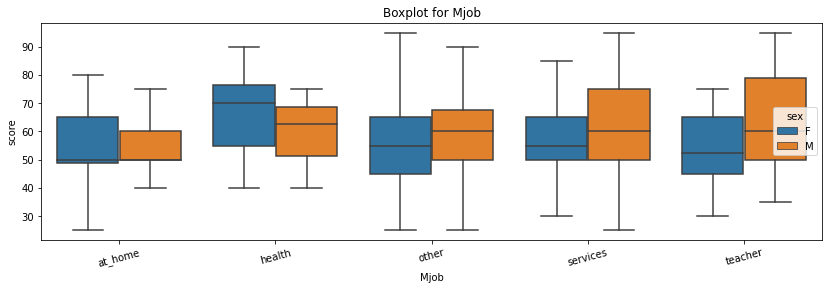

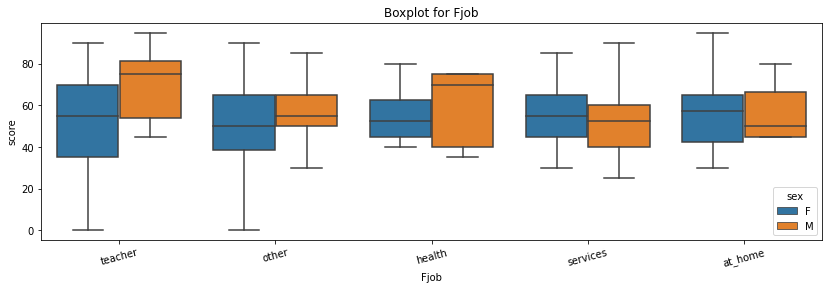

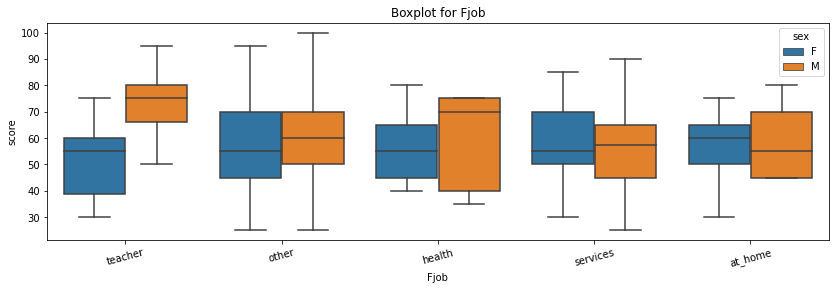

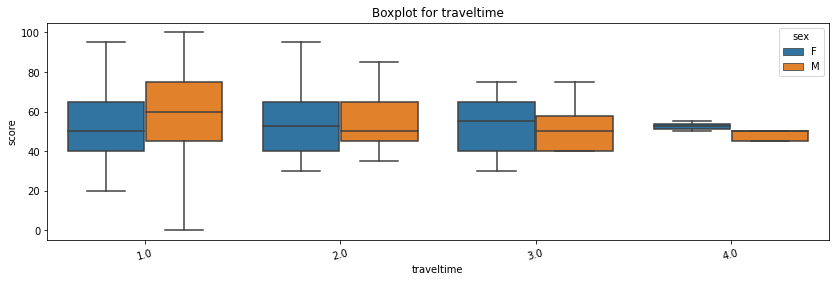

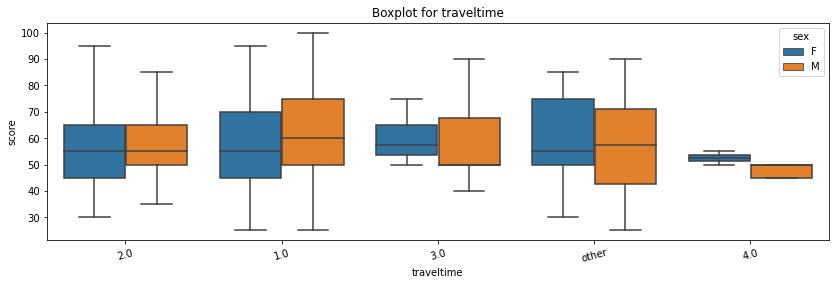

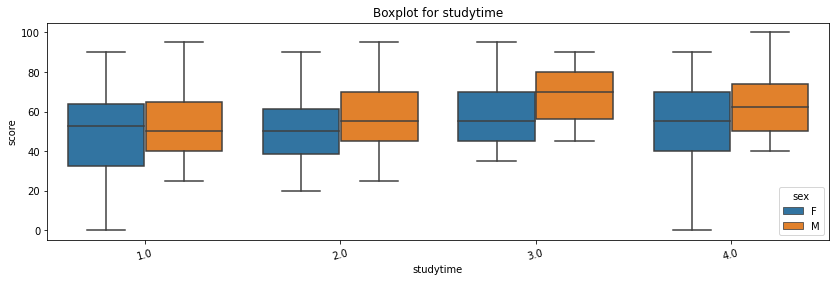

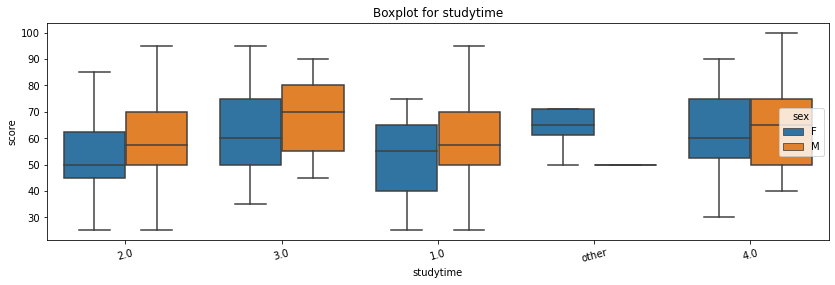

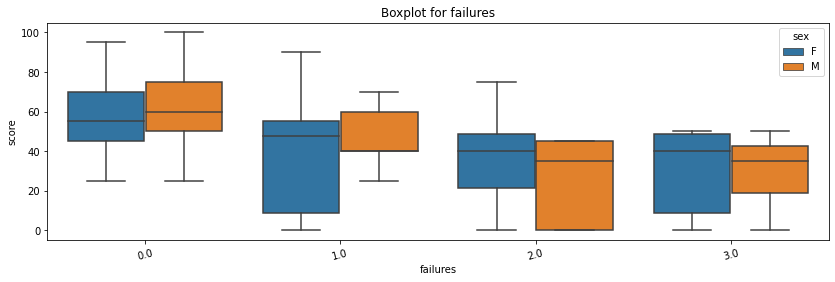

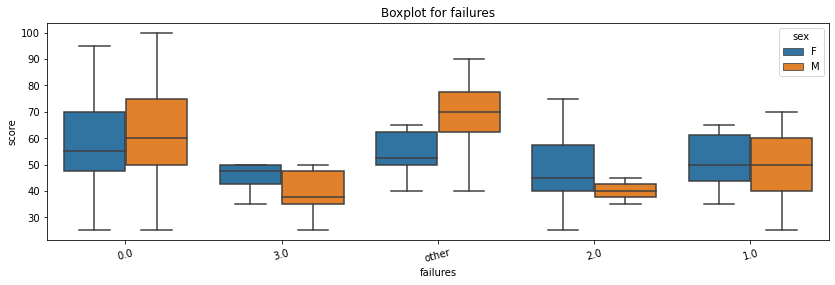

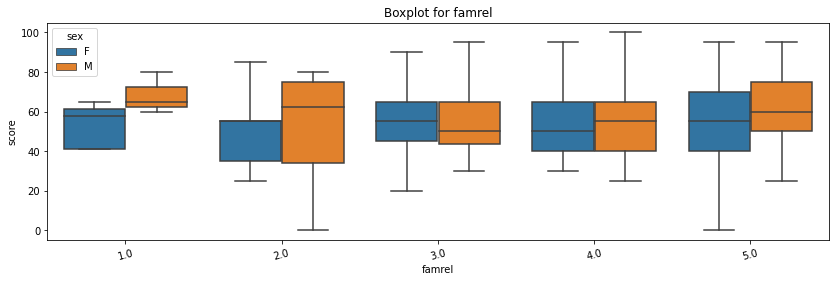

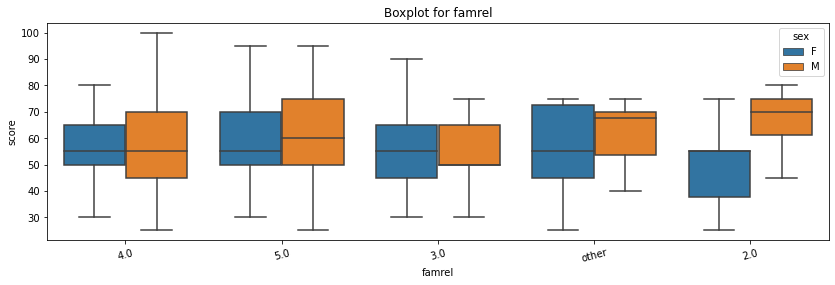

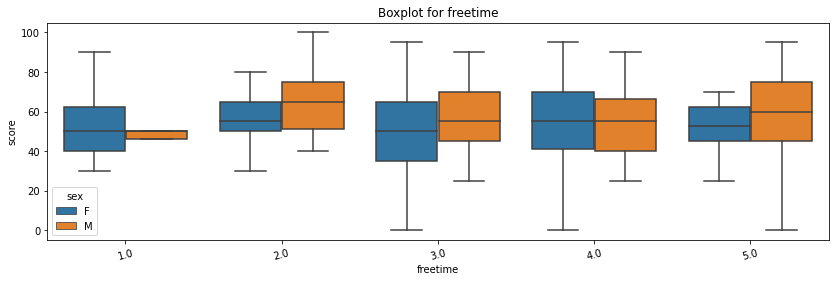

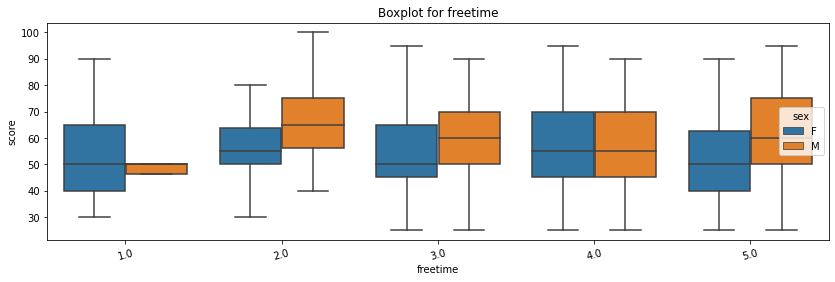

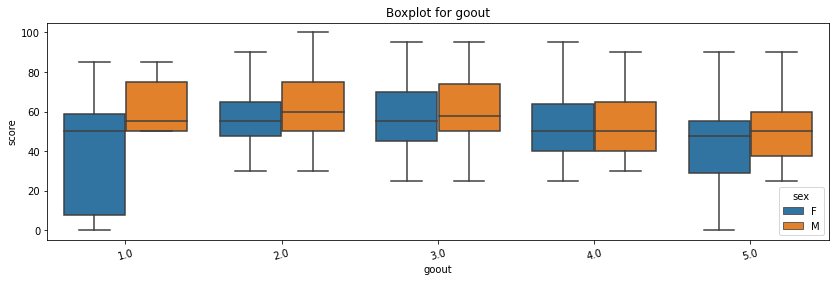

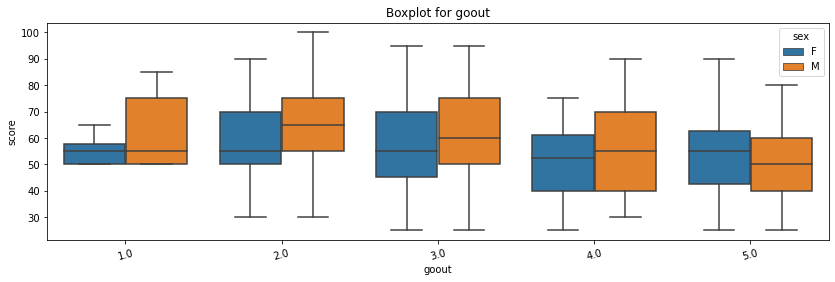

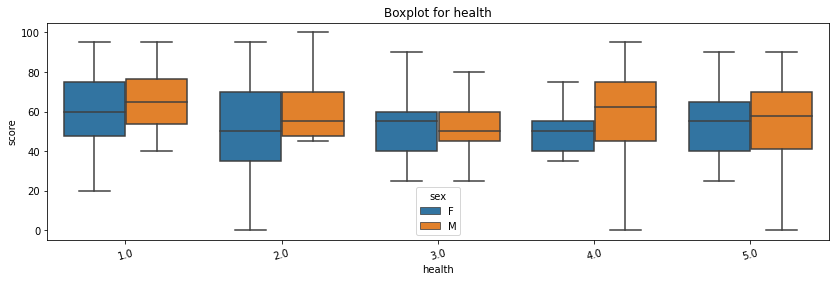

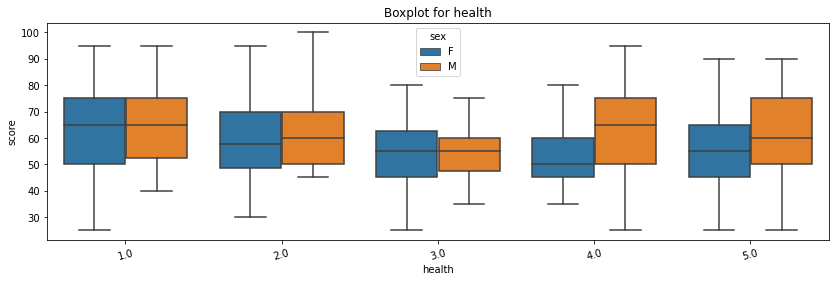

In [95]:
# Напишем функции и построим графики распределения признаков в зависимости от пола учеников.
# Будем брать только 5 наиболее повторяющихся, это избавит нас ещё от единичных ошибок в записях.

def create_boxplot(df, column):  # Результаты по оси x
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='score', y=column, hue='sex',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:5])],
                ax=ax, showfliers=False)
    plt.xticks(rotation=15)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for value in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 
              'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',]:
    create_boxplot(stud_math, value) # Для необработанных значений
    create_boxplot(students, value)  # Для обработанных значений

def create_boxplot2(df, column):  # Результаты по оси y
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', hue='sex',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:5])],
                ax=ax, showfliers=False)
    plt.xticks(rotation=15)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for value in ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures',
              'famrel', 'freetime', 'goout', 'health']:
    create_boxplot2(stud_math, value)
    create_boxplot2(students, value) 

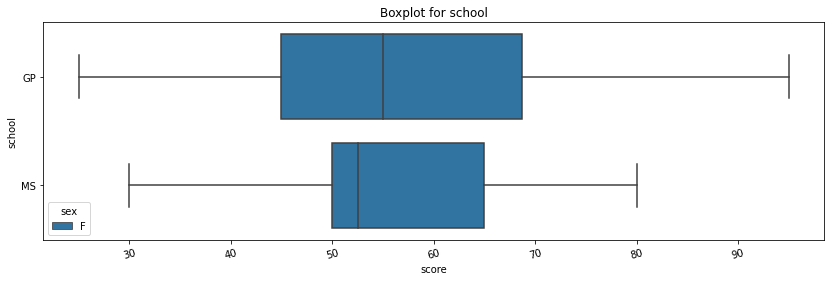

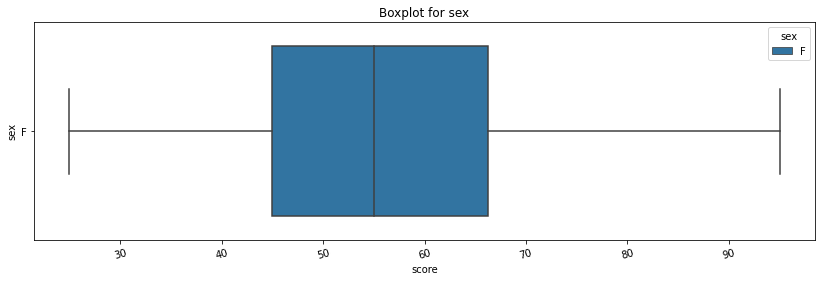

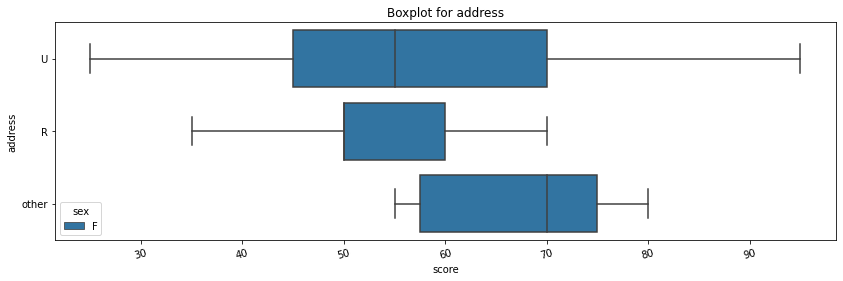

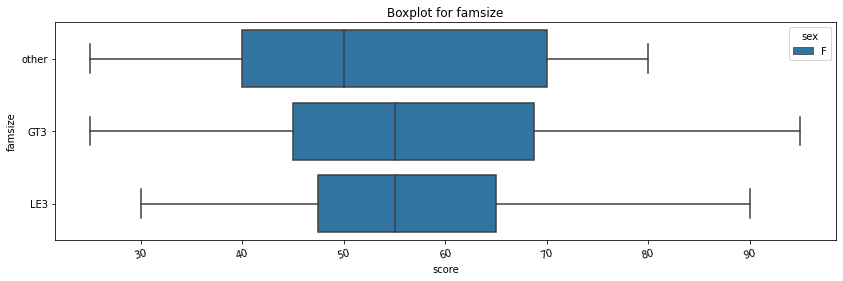

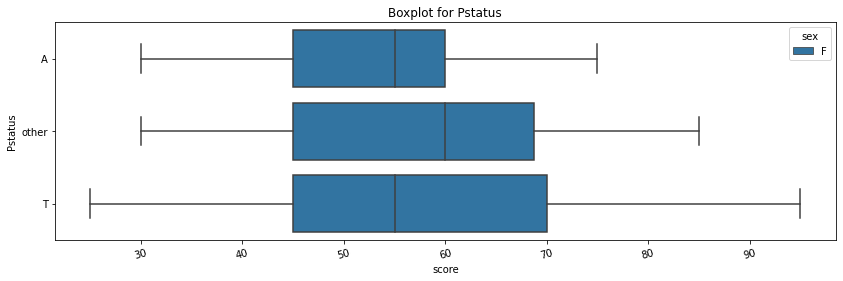

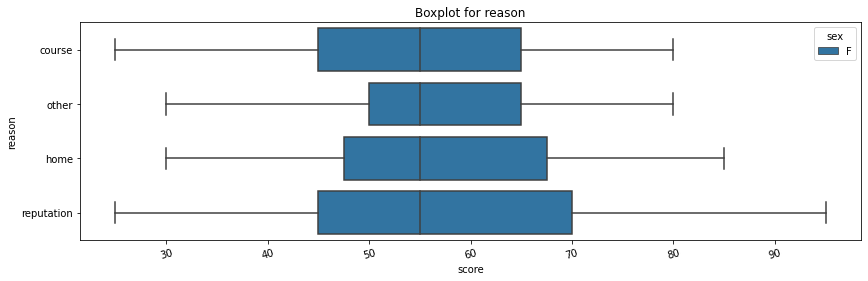

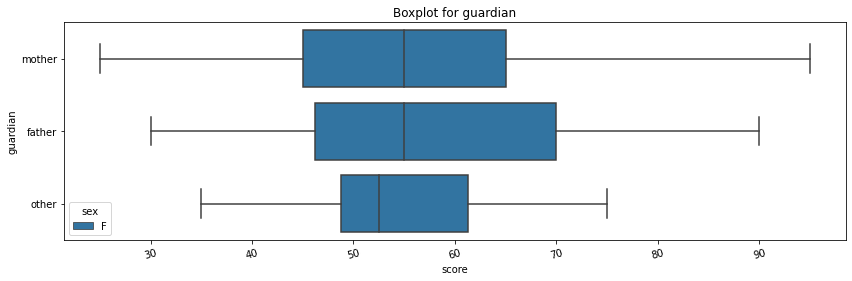

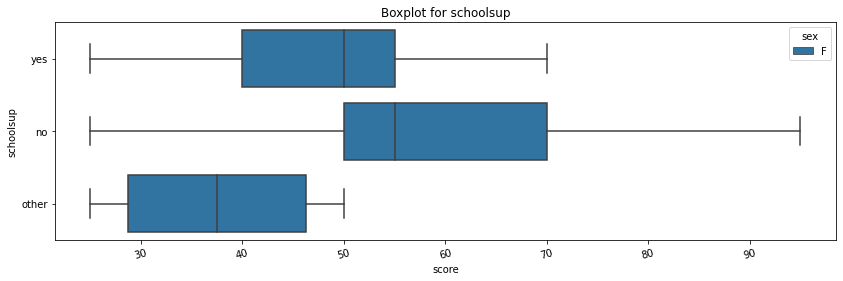

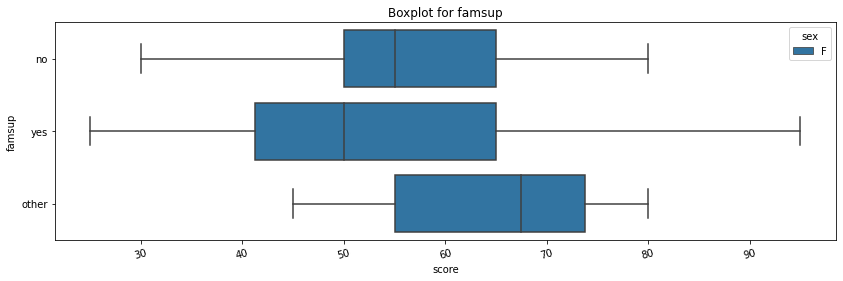

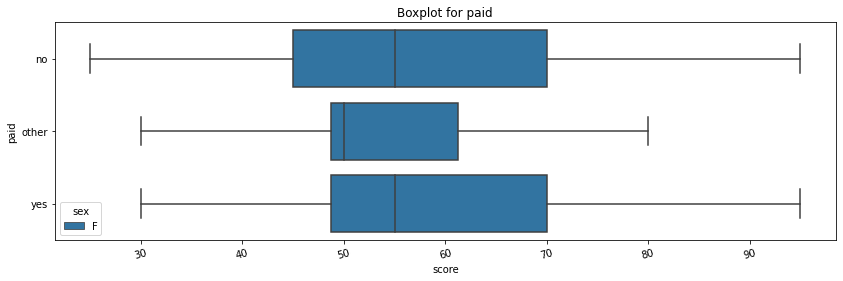

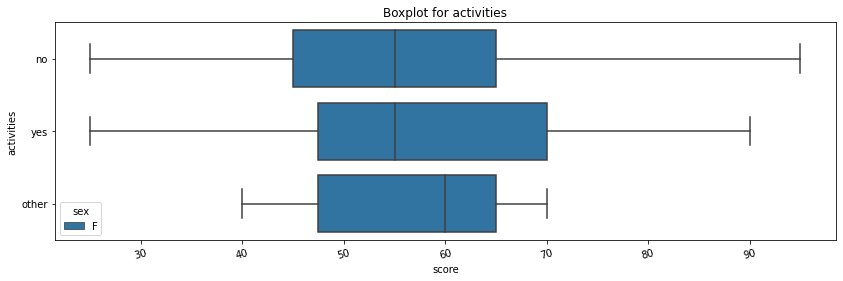

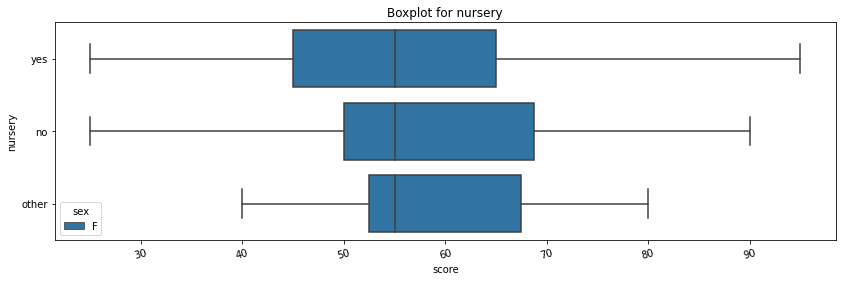

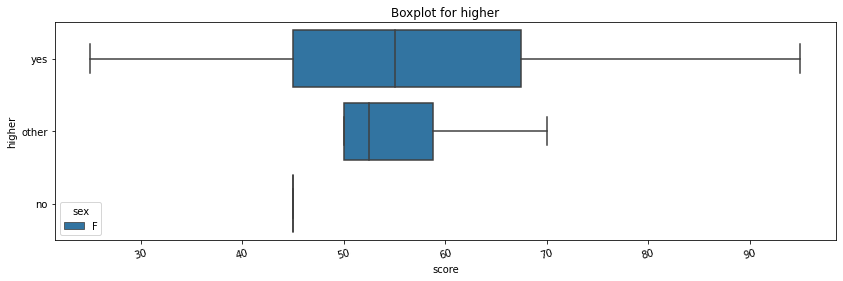

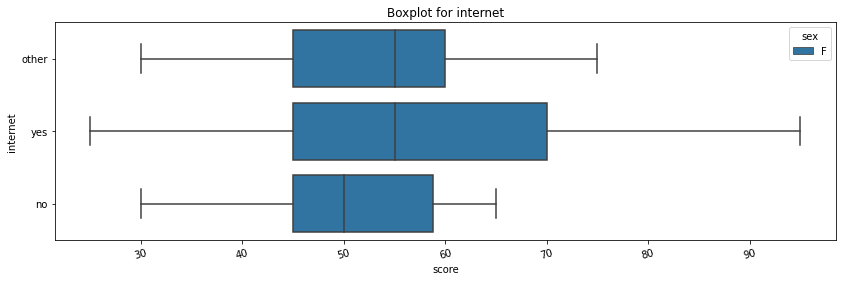

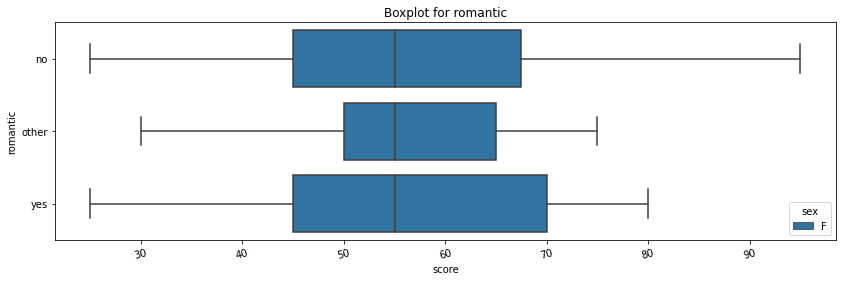

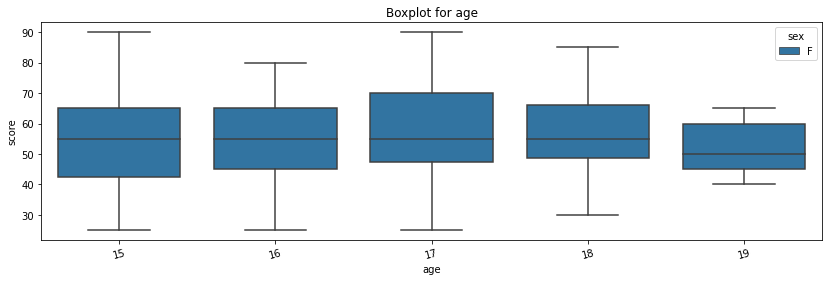

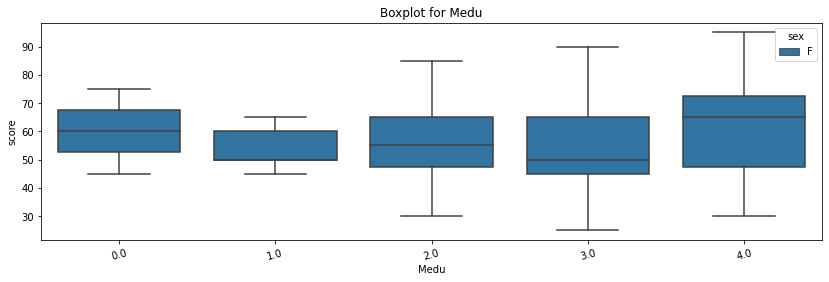

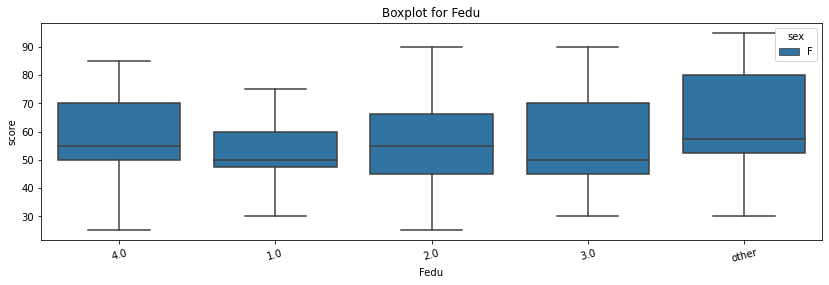

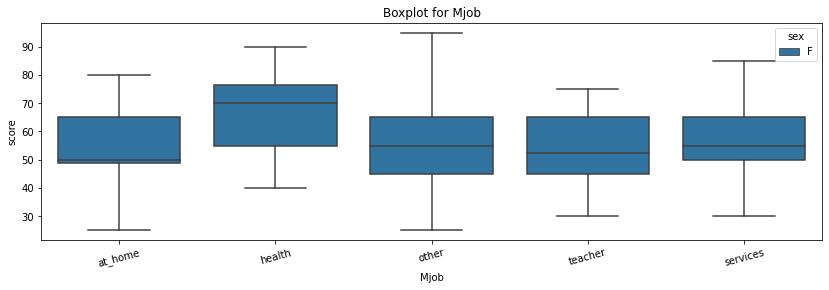

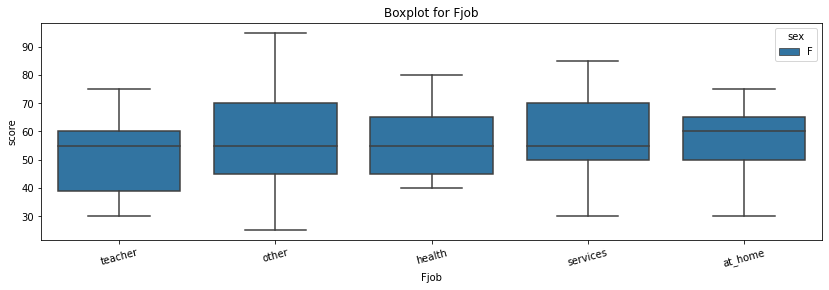

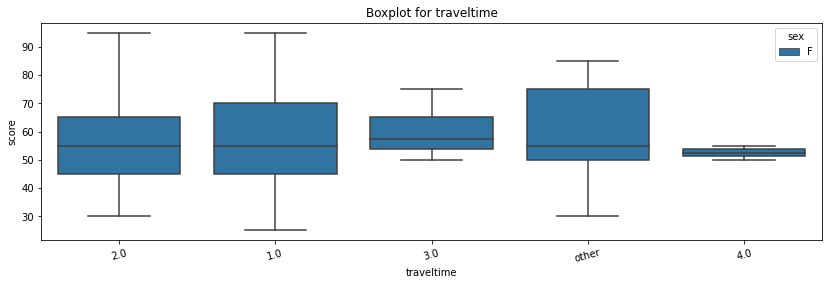

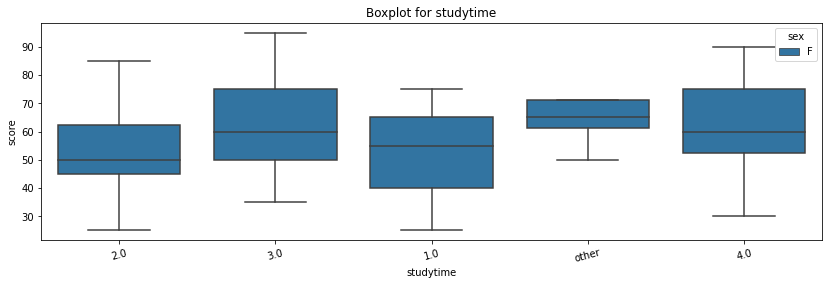

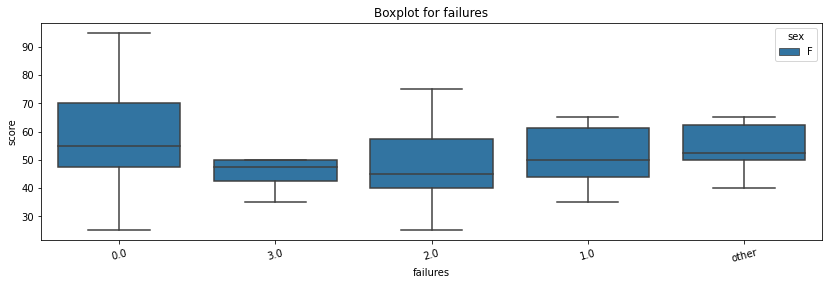

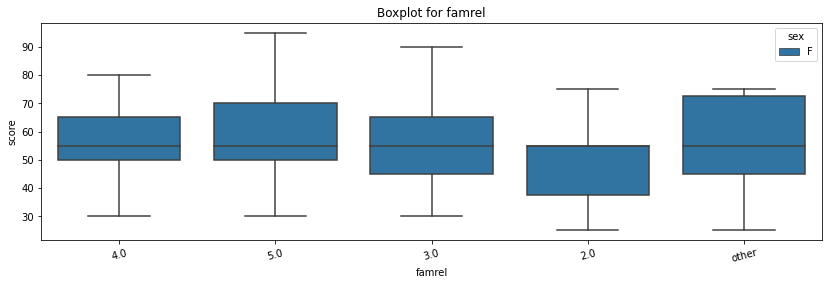

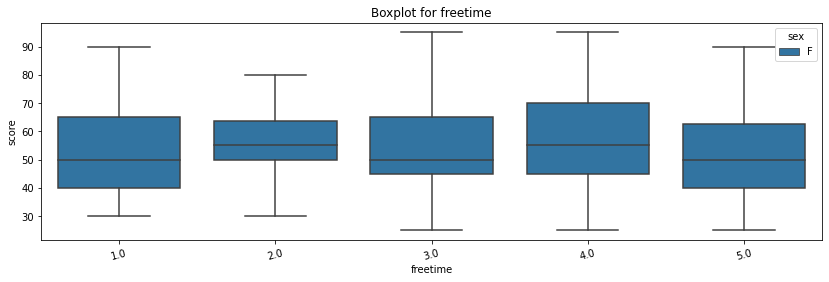

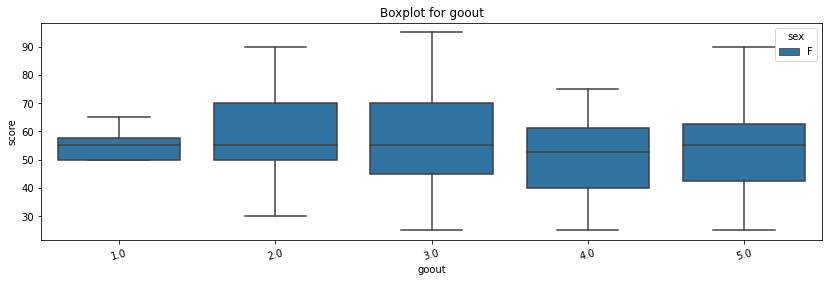

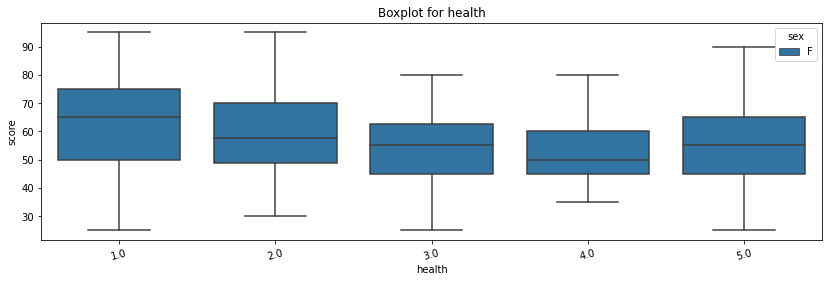

In [102]:
students_M = students[students['sex'] == 'M']
students_F = students[students['sex'] == 'F']
for value in ['school', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 
              'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',]:
#     create_boxplot(students_M, value)
    create_boxplot(students_F, value)

for value in ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures',
              'famrel', 'freetime', 'goout', 'health']:
#     create_boxplot2(students_M, value)
    create_boxplot2(students_F, value)

In [105]:
# По этим графикам можно наблюдать, что некоторые условия жизни могут по-разному влиять на учеников, в зависимости от пола.
# Поэтому для построения модели, наверное, будет лучше брать данные отдельно для юношей и отдельно для девушек.

# schoolsup, famsup - вероятно, тут помощь обычно оказывается тем, кто не успевает, поэтому не будем учитывать.

# Наиболее значимые признаки для юношей: school, address('U' - городской, 'R' - за городом), Pstatus, reason,
# higher, internet, age, Medu, Fjob, failures, freetime, goout.

# Для девушек: internet, Mjob, goout, health.

# В целом можно сказать, что данных недостаточно, для более точного анализа.
# На девушек условия жизни сказываются в гораздо меньшей степени, чем на юношей.
# И разные условия на них сказываются по-разному.